# START

In [2]:
import warnings; warnings.simplefilter('ignore')

import random

import pandas as pd
import numpy as np
import os
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

project_dir = r'/content/drive/My Drive/Colab Notebooks/'

%matplotlib inline


In [3]:
# os.listdir(project_dir + 'data/u3/')

In [4]:

in_file = project_dir + 'data/u3/' + 'data_flats.csv'

## 2.3

In [5]:
data = pd.read_csv(in_file ,sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [6]:
d0 = data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [8]:
data.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'sub_area', 'preschool_quota',
       'preschool_education_centers_raion', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'industrial_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_market_km', 'market_shop_km',
       'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
       'basketball_km', 'hospice_morgue_km', 'university_km', 'workp

## 2.6

In [9]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4],
                          [0, 1, 2]], columns=['one', 'two', 'three'])

In [10]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


In [11]:
test_data['two'].isna()

0    False
1     True
2    False
Name: two, dtype: bool

In [12]:
test_data.dropna(axis=0)

,one,two,three
2,0,1.0,2.0


In [13]:
test_data.dropna(axis=1)

,one
0,1
1,3
2,0


In [14]:
test_data.fillna(-1)

,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


In [15]:
test_data.two.fillna(test_data.two.mean())

0    2.0
1    1.5
2    1.0
Name: two, dtype: float64

In [72]:
# Задание 2.6.6

vis_data = pd.read_csv(project_dir + 'data/u3/'  + 'train.csv', encoding = 'ISO-8859-1', low_memory = False)

vis_data.info()
# result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [17]:
# Получаем самое частое название штата (важно: не количество! а индексное значение!)
vis_data.state.value_counts().head(1).keys()[0]

'MI'

In [18]:
# сколько пропущено всего значений в столбце state
vis_data.state.isna().sum()

93

In [19]:
# result = vis_data['state'].fillna('MI')
result = vis_data['state'].fillna(vis_data.state.value_counts().head(1).keys()[0])


In [20]:
# Задание 2.6.7

data.shape

(30469, 56)

In [21]:
data.dropna().shape

(13652, 56)

In [22]:
data.dropna(inplace=True)

In [23]:
data.shape

(13652, 56)

## 2.8

### minmax нормализация

MinMaxScaler и StandardScaler сохраняют параметры, с которыми проводят нормализацию. Поэтому после нормализации признаков в тренировочной выборке нужно будет применить ту же нормализацию с валидационными и тестовыми данными.

In [24]:
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 1.        ,        nan],
       [1.        ,        nan, 1.        ],
       [0.        , 0.        , 0.        ]])

### std нормализация

In [25]:
scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124,  1.        ,         nan],
       [ 1.33630621,         nan,  1.        ],
       [-1.06904497, -1.        , -1.        ]])

In [66]:
# Задание 2.8.3

vis_data.balance_due.isna().sum()

0

In [27]:
balance = vis_data.balance_due.values.reshape(-1,1)
balance

array([[305.],
       [ 75.],
       [  0.],
       ...,
       [  0.],
       [  0.],
       [  0.]])

In [28]:
min_val = scaler.fit_transform(balance).min()
round(min_val, 5)

-13.14733

## 2.10

In [29]:
# Задание 2.10.3

bal_sqrt = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0])
# sns.boxplot(np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]))

abs(bal_sqrt.median() - bal_sqrt.mean())


0.4525960609393067

In [30]:
# 

apartment = pd.read_csv(project_dir + 'data/u3/'  + 'latlons.csv', low_memory = False)


apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121769 entries, 0 to 121768
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   address  121769 non-null  object 
 1   lat      121762 non-null  float64
 2   lon      121762 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.8+ MB


In [31]:
apartment.sample(5)

,address,lat,lon
42082,"11844 grand river, Detroit MI",42.375953,-83.156052
2297,"4273 clements, Detroit MI",42.388164,-83.136975
97911,"13979 mitchell, Detroit MI",42.417830,-83.070617
101550,"8775 bessemore, Detroit MI",42.393644,-83.014231
73744,"17550 stansbury, Detroit MI",42.421044,-83.183119


In [32]:
# data.columns.sort_values()
data.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'sub_area', 'preschool_quota',
       'preschool_education_centers_raion', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'industrial_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_market_km', 'market_shop_km',
       'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
       'basketball_km', 'hospice_morgue_km', 'university_km', 'workp

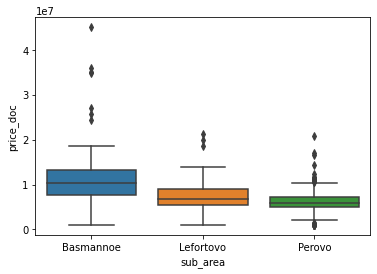

In [33]:
# Задание 2.10.4

# data.sub_area.value_counts().sort_index().index

# Lefortovo
# Perovo
# Basmannoe

sub_area_filter = ['Lefortovo', 'Perovo', 'Basmannoe']

sns.boxplot(x='sub_area', y='price_doc', data=data.query('sub_area in @sub_area_filter'))

In [34]:
data.query('sub_area in @sub_area_filter')[['sub_area','price_doc']].groupby('sub_area').mean()

,price_doc
sub_area,
Basmannoe,1.158772e+07
Lefortovo,7.425565e+06
Perovo,6.073200e+06


## 2.12

In [35]:
latlons = pd.read_csv( project_dir + 'data/u3/' + 'latlons.csv')
vis_data = pd.concat([vis_data, latlons], axis=1)

In [36]:
latlons.columns

Index(['address', 'lat', 'lon'], dtype='object')

In [37]:
# Задание 2.12.6
vis_data.columns.sort_values()


Index(['address', 'admin_fee', 'agency_name', 'balance_due', 'city',
       'clean_up_cost', 'collection_status', 'compliance', 'compliance_detail',
       'country', 'discount_amount', 'disposition', 'fine_amount',
       'grafitti_status', 'hearing_date', 'inspector_name', 'judgment_amount',
       'lat', 'late_fee', 'lon', 'mailing_address_str_name',
       'mailing_address_str_number', 'non_us_str_code', 'payment_amount',
       'payment_date', 'payment_status', 'state', 'state_fee', 'ticket_id',
       'ticket_issued_date', 'violation_code', 'violation_description',
       'violation_street_name', 'violation_street_number',
       'violation_zip_code', 'violator_name', 'zip_code'],
      dtype='object')

In [38]:
vis_data[['balance_due', 'discount_amount']]

,balance_due,discount_amount
0,305.0,0.0
1,75.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
250301,0.0,0.0
250302,0.0,0.0
250303,0.0,0.0
250304,0.0,0.0


In [39]:
# Задание 2.12.6

pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])
poly_features


array([[  1., 305.,   0., ...,   0.,   0.,   0.],
       [  1.,  75.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.]])

In [40]:
poly_features.shape

(250306, 10)

In [41]:
poly_features.mean(axis=0) # answer = 6

array([ 1.00000000e+00,  2.22449058e+02,  1.25166796e-01,  4.17195810e+05,
       -9.85531709e+00,  1.17817392e+01,  2.04200098e+09,  1.17924384e+05,
       -1.49564074e+02,  3.07417605e+03])

In [42]:
# Задание 2.12.7

# ticket_issued_date

datetime_vals = pd.to_datetime(vis_data.ticket_issued_date.dropna())
datetime_vals.head()


0   2004-03-16 11:40:00
1   2004-04-23 12:30:00
2   2004-04-26 13:40:00
3   2004-04-26 13:30:00
4   2004-04-26 13:00:00
Name: ticket_issued_date, dtype: datetime64[ns]

In [43]:
vis_data['is_weekend'] = datetime_vals.dt.weekday > 4
vis_data['holiday'] = datetime_vals.dt.weekday

In [44]:
vis_data['is_weekend'].value_counts()

# answer = 1620

False    248686
True       1620
Name: is_weekend, dtype: int64

In [45]:
# Задание 2.12.8

data.sample(9)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
858,861,59,41.0,4.0,Vyhino-Zhulebino,7610.0,10,16049.0,11,0,1322.0,3,0,11,11,0,8,1,1.800178,1.440142,17.281706,1.440142,0.211775,0.472527,2.184562,0.120546,0.785750,1.581992,18.983906,0.155707,1.868483,0.726773,7.144980,11.278528,12.171133,13.410574,7.756839,0.428827,0.296211,5.215880,5.215880,6.467447,1.759711,1.592973,1.058354,1.578740,0.882846,1.598464,0.165435,0.472527,2.395914,1.488939,2.718224,1.592938,poor,1000000
14373,14378,48,28.0,4.0,Ajeroport,2058.0,3,4975.0,6,1,1020.0,0,1,4,3,0,3,14,1.983866,0.902211,10.729165,0.894097,0.346220,0.097120,1.421310,0.248559,0.448671,4.298958,51.587495,0.240536,2.886435,8.936787,3.023756,5.672290,6.429977,7.713435,16.757182,0.549367,0.406767,3.176535,4.169453,3.117268,1.871683,1.538849,3.038766,0.097120,0.430015,0.494895,0.479294,0.097120,1.179505,0.481596,4.833121,5.270454,poor,10200000
10880,10885,74,45.0,2.0,Kon'kovo,2627.0,5,9650.0,5,0,350.0,3,0,11,3,0,11,6,1.043026,0.566437,6.623372,0.551948,0.326447,0.439786,2.828857,0.117088,1.870261,9.132002,109.584025,0.080809,0.969714,3.090480,9.153747,12.117281,13.284044,14.015814,0.909041,1.722662,1.085076,1.922599,0.998220,3.748463,3.897096,1.926551,2.609208,1.952705,0.311743,0.965816,0.489314,0.439786,1.356290,0.798466,4.324333,6.302515,satisfactory,12800000
3604,3609,30,17.0,5.0,Gol'janovo,5041.0,6,11081.0,7,0,125.0,3,0,5,3,0,5,3,2.458489,1.869872,22.438465,1.869872,0.682473,0.886531,2.435315,0.808651,0.000000,4.347305,52.167662,0.073538,0.882461,3.143018,7.571912,9.683505,10.416237,12.217023,16.014793,1.739764,0.808968,2.652839,4.314413,3.620130,2.137556,2.511483,3.139971,0.946432,0.524999,0.660346,1.403955,0.886531,1.824006,0.750268,7.225134,6.761191,good,3600000
28231,28236,73,47.0,8.0,Hamovniki,165.0,5,9337.0,8,1,4702.0,5,1,23,2,2,5,87,1.186967,0.860999,10.221720,0.851810,0.213864,0.583344,0.179335,0.048585,0.391713,1.477239,17.726865,0.287339,3.448062,10.099576,0.702045,1.992539,3.151390,4.028637,12.254859,0.584828,0.591871,0.627783,1.912527,1.750035,1.907711,0.849713,1.548681,0.835906,1.401885,0.224952,1.253686,0.583344,0.171917,0.179335,0.731053,2.234605,poor,21800000
23427,23432,62,37.0,4.0,Taganskoe,3318.0,5,9748.0,10,0,2301.0,3,1,24,1,1,19,56,1.289333,0.864325,9.200619,0.766718,0.125349,0.578547,0.614076,0.202994,0.658384,1.998096,23.977150,0.208402,2.500828,10.482677,1.588088,1.472545,2.568888,3.599469,3.389880,0.818878,0.165720,0.810425,0.810425,3.283756,0.849073,1.963361,0.825363,0.796660,0.418231,0.645881,1.406800,0.722615,0.326106,0.288673,0.760974,1.682023,excellent,13950000
24186,24191,54,32.0,10.0,Novo-Peredelkino,4249.0,7,9373.0,7,0,240.0,3,0,6,4,0,1,0,3.754523,1.266041,11.091147,0.924262,0.269285,0.362587,3.620559,0.166390,0.286000,2.952453,35.429435,0.118131,1.417567,6.175255,16.206761,18.926706,20.096659,20.962606,16.658362,5.977602,0.601962,1.757020,1.695755,15.010941,7.452496,6.458726,14.006018,8.710643,0.869026,4.085867,0.810058,0.362587,0.915723,0.908832,14.571927,8.942525,good,7850000
21070,21075,45,31.0,5.0,Mozhajskoe,4182.0,6,8658.0,6,0,900.0,1,0,12,2,0,9,9,3.911852,2.545401,40.181717,3.348476,0.550584,0.351332,1.938

In [46]:
data.ecology.value_counts().index

Index(['poor', 'good', 'satisfactory', 'excellent', 'no data'], dtype='object')

In [47]:
ecology_dict = dict(zip(['poor', 'good', 'satisfactory', 'excellent', 'no data'], [2, 3, 1, 4, 0]))
ecology_dict


{'excellent': 4, 'good': 3, 'no data': 0, 'poor': 2, 'satisfactory': 1}

In [48]:
data.ecology = data.ecology.replace(to_replace=ecology_dict)

In [49]:
round(data.ecology.mean(), 2)

2.33

In [50]:
# pd.get_dummies(d0.sub_area, drop_first=True).head()
pd.get_dummies(d0.sub_area).head()

,Ajeroport,Akademicheskoe,Alekseevskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,Birjulevo Vostochnoe,Caricyno,Cheremushki,Danilovskoe,Dmitrovskoe,Donskoe,Filevskij Park,Gol'janovo,Golovinskoe,Hamovniki,Horoshevo-Mnevniki,Hovrino,Izmajlovo,Jakimanka,Jaroslavskoe,Jasenevo,Juzhnoe Medvedkovo,Juzhnoportovoe,Kapotnja,Kon'kovo,Koptevo,Krjukovo,Kuncevo,Kurkino,Lefortovo,Levoberezhnoe,Ljublino,Lomonosovskoe,Losinoostrovskoe,Mar'ina Roshha,Meshhanskoe,...,Nagatino-Sadovniki,Nagatinskij Zaton,Nekrasovka,Novo-Peredelkino,Novogireevo,Obruchevskoe,Ochakovo-Matveevskoe,Ostankinskoe,Pechatniki,Perovo,Pokrovskoe Streshnevo,Preobrazhenskoe,Presnenskoe,Prospekt Vernadskogo,Ramenki,Rostokino,Savelki,Savelovskoe,Severnoe,Severnoe Butovo,Severnoe Tushino,Shhukino,Sokol,Sokol'niki,Sokolinaja Gora,Solncevo,Sviblovo,Taganskoe,Tekstil'shhiki,Timirjazevskoe,Tverskoe,Veshnjaki,Vnukovo,Vostochnoe,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
pd.get_dummies(data.sub_area, drop_first=True).head()

,Akademicheskoe,Alekseevskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,Birjulevo Vostochnoe,Caricyno,Cheremushki,Danilovskoe,Dmitrovskoe,Donskoe,Filevskij Park,Gol'janovo,Golovinskoe,Hamovniki,Horoshevo-Mnevniki,Hovrino,Izmajlovo,Jakimanka,Jaroslavskoe,Jasenevo,Juzhnoe Medvedkovo,Juzhnoportovoe,Kapotnja,Kon'kovo,Koptevo,Krjukovo,Kuncevo,Kurkino,Lefortovo,Levoberezhnoe,Ljublino,Lomonosovskoe,Losinoostrovskoe,Mar'ina Roshha,Meshhanskoe,Metrogorodok,...,Nagatino-Sadovniki,Nagatinskij Zaton,Nekrasovka,Novo-Peredelkino,Novogireevo,Obruchevskoe,Ochakovo-Matveevskoe,Ostankinskoe,Pechatniki,Perovo,Pokrovskoe Streshnevo,Preobrazhenskoe,Presnenskoe,Prospekt Vernadskogo,Ramenki,Rostokino,Savelki,Savelovskoe,Severnoe,Severnoe Butovo,Severnoe Tushino,Shhukino,Sokol,Sokol'niki,Sokolinaja Gora,Solncevo,Sviblovo,Taganskoe,Tekstil'shhiki,Timirjazevskoe,Tverskoe,Veshnjaki,Vnukovo,Vostochnoe,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
data.sample(19)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
16263,16268,36,17.0,14.0,Sokol'niki,933.0,5,5050.0,5,0,4849.0,3,0,17,6,0,6,9,0.923981,0.460824,5.529883,0.460824,0.182362,0.514089,1.725654,0.318773,0.196354,1.897093,22.765120,0.094150,1.129803,9.865480,0.797041,2.693037,3.440740,5.220270,12.577857,0.697792,0.181765,0.283573,1.090315,2.551566,1.006386,0.580483,2.040703,0.832139,0.219940,0.409512,0.240246,0.524220,0.520773,0.510639,0.947712,2.764956,2,6700000
21718,21723,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,1015.0,2,0,7,1,0,5,1,1.246330,0.881610,10.579323,0.881610,0.454893,0.479258,1.166272,0.565459,0.789347,2.954029,35.448344,0.086862,1.042338,2.227337,6.775219,9.353414,9.919331,11.538106,14.989244,1.101694,1.049276,2.726582,1.721069,2.840919,0.943293,0.364469,3.692525,3.634124,0.529892,2.123989,0.998083,0.479258,0.277764,0.544299,1.650776,0.721062,2,6400000
11419,11424,34,19.0,16.0,Vyhino-Zhulebino,7610.0,10,16049.0,11,0,1322.0,3,0,11,11,0,8,1,1.341888,0.743151,8.917818,0.743151,0.257745,0.505185,2.161912,0.000000,0.170312,0.885002,10.620018,0.065922,0.791062,1.095739,6.794547,10.861579,11.701681,12.989583,7.637222,0.721222,0.513868,5.096263,5.096263,6.848297,1.838891,2.342201,0.868633,1.998709,0.390306,1.171504,0.243750,0.505185,1.884779,1.447980,2.677320,2.342124,2,5500000
20828,20833,52,30.0,2.0,Cheremushki,1944.0,4,6887.0,5,0,262.0,3,0,6,4,0,6,10,2.029755,1.109376,13.137138,1.094761,0.107040,0.455144,1.564848,0.126598,1.039210,5.288104,63.457244,0.123380,1.480556,7.480243,4.384125,7.373518,8.607785,9.320333,6.142776,2.856976,0.661496,1.479087,6.257491,6.446021,2.084496,0.634097,0.911645,1.896124,0.930987,0.793522,0.544394,0.548556,1.344954,0.394281,1.567567,2.493897,1,13150000
25338,25343,58,42.0,3.0,Pechatniki,2936.0,5,5791.0,5,0,730.0,0,0,4,5,0,2,8,2.026690,1.160770,13.929246,1.160770,0.078140,0.306405,0.734474,0.210306,0.625304,1.157501,13.890014,0.234566,2.814792,6.390978,4.194243,7.607112,8.863647,9.741079,4.679820,1.654777,0.285813,2.129429,4.165663,4.503326,2.014116,1.485395,0.601991,1.976661,0.679070,0.518616,0.525517,0.306405,1.758770,0.728695,7.894729,3.930503,4,7800000
4609,4614,40,37.0,4.0,Severnoe Tushino,4116.0,5,9891.0,5,0,1145.0,3,0,1,2,0,5,0,2.025351,1.360557,16.326681,1.360557,0.715597,0.339331,0.555228,0.140051,0.887930,5.147642,61.771704,0.146048,1.752574,2.752088,10.521521,13.220735,13.969091,15.262622,21.084025,2.675596,0.546809,2.999315,7.863997,3.918096,0.456702,1.864199,7.665755,1.297401,0.561684,0.546809,1.196214,0.339331,1.291818,2.379678,13.753271,10.892159,1,6933290
13860,13865,35,19.0,1.0,Pechatniki,2936.0,5,5791.0,5,0,730.0,0,0,4,5,0,2,8,2.624285,1.206608,14.479292,1.206608,0.313260,0.103149,0.287821,0.017474,0.672265,1.558767,18.705200,0.209471,2.513650,6.913254,4.035547,7.281521,8.591245,9.437735,5.081085,2.056043,0.730580,2.530694,4.865984,4.904591,1.930673,1.761732,1.302312,1.878341,0.836635,1.037986,0.401228,0.103149,2.134595,0.464738,7.524024,3.720080,4,4850000
15094,15099,42,26.0,5.0,Perovo,2232.0,7,7966.0,7,0,1548.0,3,0,13,0,0,2,7,1.966423,1.323537,14.899557,1.241630,0.081207,0.369323,2.192096,0.651136,1.128060,3.747709,44.972508,0.17

In [53]:
data.shape[1]

56

In [54]:
data = pd.concat([data, pd.get_dummies(data.sub_area, drop_first=True)], axis=1)


In [55]:
data.drop(columns=['sub_area'])

,id,full_sq,life_sq,floor,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,...,Nagatino-Sadovniki,Nagatinskij Zaton,Nekrasovka,Novo-Peredelkino,Novogireevo,Obruchevskoe,Ochakovo-Matveevskoe,Ostankinskoe,Pechatniki,Perovo,Pokrovskoe Streshnevo,Preobrazhenskoe,Presnenskoe,Prospekt Vernadskogo,Ramenki,Rostokino,Savelki,Savelovskoe,Severnoe,Severnoe Butovo,Severnoe Tushino,Shhukino,Sokol,Sokol'niki,Sokolinaja Gora,Solncevo,Sviblovo,Taganskoe,Tekstil'shhiki,Timirjazevskoe,Tverskoe,Veshnjaki,Vnukovo,Vostochnoe,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,1,43,27.0,4.0,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,34,19.0,3.0,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,43,29.0,2.0,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,77,77.0,4.0,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,25,14.0,10.0,933.0,5,5050.0,5,0,4849.0,3,0,17,6,0,6,9,1.453762,1.026916,12.322993,1.026916,0.501166,0.516979,2.393239,0.632445,0.707268,2.603671,31.244046,0.050211,0.602533,8.618597,2.026623,3.940566,4.686895,6.468719,13.704968,1.825870,0.132256,1.278912,1.733264,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,30466,56,29.0,13.0,4116.0,5,9891.0,5,0,1145.0,3,0,1,2,0,5,0,2.622565,1.580238,8.510351,0.709196,0.225720,0.193474,1.876243,0.349807,1.646417,5.303922,63.647059,0.189581,2.274970,1.486707,11.896884,14.587359,15.339712,16.626186,20.481457,0.293278,1.003262,3.155594,7.261430,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30462,30467,56,51.0,19.0,2057.0,1,3741.0,2,0,192.0,1,0,4,6,0,5,4,0.815305,0.652244,7.447930,0.620661,0.414927,0.566309,0.680210,0.143626,0.000000,3.262078,39.144932,0.086493,1.037921,5.363124,6.173473,8.405744,9.080098,10.514468,7.475368,2.929117,0.378930,2.893346,2.057277,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

## 2.14


In [56]:
# Задание 2.14.5
# vis_data.sample(5)


In [73]:
vis_data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [74]:
balance = vis_data.balance_due.dropna()

quartile_1, quartile_3 = np.percentile(balance, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - iqr * 1.5
upper_bound = quartile_3 + iqr * 1.5

abs(balance[balance > upper_bound].max()) - abs(balance[balance < lower_bound].min())


3280.0

In [81]:
abs(balance.min() - balance.max())

18780.0

# END